## Promedio


In [17]:
import numpy as np
from scipy import signal


In [21]:
import cv2
import os
import numpy as np

def mean_filter(imagen, kernel_size):
    """
    This function applies the mean filter of kernel_size to an image
    Sintaxis: mean_filter(image:image, kernel_size:tuple)
    Entrada:
        image -> Array_like representing the image
        kernel_size -> tuple with the dimensions of the kernel
    Salida:
        Array that represents the new image with the mean filter applied
    """
    (height, width) = imagen.shape
    blank_image = np.zeros((height, width), np.uint8)
    for i in range(width):
        for j in range(height):
            blank_image[j, i] = mean_filter_aux(imagen, kernel_size, i, j)
    return blank_image

def mean_filter_aux(Imagen, window, coordena_x, coordena_y):
    """
    Auxilary functio for the mean calculation, get a submatrix that will act as a kernel for the image
    :param Imagen: Array (numpy) representing the image
    :param window: Size of the kernel or window
    :param coordena_x: Coordinate for the submatrix center in x
    :param coordena_y: Coordinate for the submatrix center in y
    :return: An array with the mean values for each channel
    """
    kernel = cv2.getRectSubPix(Imagen, window, (coordena_x, coordena_y))
    return round(np.mean(kernel))

    
  

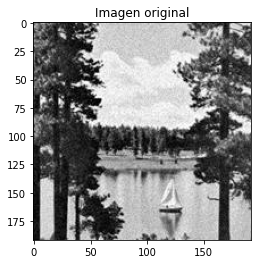

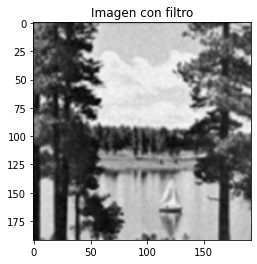

In [28]:
import cv2
import matplotlib.pyplot as plt

img_path = "./Imagenes/T.jpeg"

image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
[m, n] = image.shape


kernel_size = (3,3)

filtered_image = mean_filter(image, kernel_size)


plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen original")
plt.show()

plt.imshow(filtered_image, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen con filtro")
plt.show()


## Promedio geometrico

In [30]:
import numpy as np
from scipy import signal


In [31]:
from scipy.stats.mstats import gmean
import cv2

def geometric_mean_filter(image, kernel_size):
    """
    This function applies the geometrix mean filter to an image in array format
    :param image: array_like representing the image
    :param kernel_size: tuple representing the kernel size
    :return: array_like representing the image with the geometric mean filter 
    """

    (height, width) = image.shape

    blank_image = np.zeros((height, width), np.uint8)
    for i in range(width):
        for j in range(height):
            blank_image[j, i] = geometric_mean_filter_aux(image, kernel_size, i, j)
    return blank_image


def geometric_mean_filter_aux(Imagen, window, coordena_x, coordena_y):
    """
    Auxilary function for the geometric mean calculation, get a submatrix that will act as a kernel for the image
    :param Imagen: Array (numpy) representing the image
    :param window: Size of the kernel or window
    :param coordena_x: Coordinate for the submatrix center in x
    :param coordena_y: Coordinate for the submatrix center in y
    :return: An array with the geometric mean values for each channel
    """

    kernel = cv2.getRectSubPix(Imagen, window, (coordena_x, coordena_y)).clip(1, 255)
    prod = np.prod(kernel) + 1
    return prod**(1/(window[0]*window[1]))

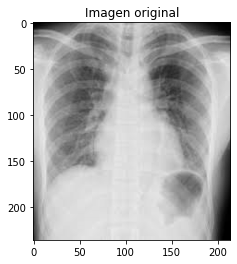

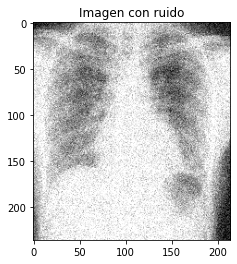

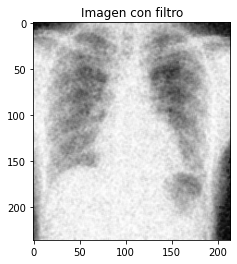

In [32]:
import cv2
import matplotlib.pyplot as plt

img_path = "./Imagenes/chest.jpg"

image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
[m, n] = image.shape
noise = np.random.normal(loc = 30, scale = 30, size = (m,n))

image_with_noise = image + noise
kernel_size = (3,3)

image_with_noise = np.float32(image_with_noise).clip(0, 255)
filtered_image = geometric_mean_filter(image_with_noise, kernel_size)

plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen original")
plt.show()

plt.imshow(image_with_noise, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen con ruido")
plt.show()

plt.imshow(filtered_image, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen con filtro")
plt.show()

## Promedio Armónico

In [35]:
pkg load image

function filtered_image = harmonic_mean_filter(img, kernel_dims)
    %This function applies the harmonic mean filter to an image in array format
    %image: array_like representing the image
    %kernel_dims: dimentions for the kernel
    %returns: array_like representing the image with the harmonic mean filter 
    [m, n] = size(img);
    filtered_image = zeros(m, n);    
    for i = 1:n
        for j = 1:m
            submatrix = get_submatrix(img, kernel_dims, kernel_dims, i , j);
            %subma = block(image, i , j, kernel_dims, kernel_dims);
            [m2, n2] = size(submatrix);
            sum_items = 0;
            for x = 1:n2
                for y = 1:m2
                    element = submatrix(y, x);
                    if (element != 0)
                        sum_items = sum_items + 1/(element);
                    endif
                endfor
            endfor
            filtered_image(j , i) = numel(submatrix)/sum_items;
        endfor
    endfor
    filtered_image = im2uint8(filtered_image);
endfunction


function submatrix = get_submatrix(image, size_x, size_y, i , j)
    %This function gets the submatrix of a new 
    %image: array_like representing the image
    %size_x: dimentions for the kernel in x axis
    %size_y: dimentions for the kernel in y axis
    %i: center in x
    %j:center in y
    %returns: array of the submatrix of the g
    distance_x = round(size_x/2) - 1;
    distance_y = round(size_y/2) - 1; 
    submatrix = get_submatrix_aux(image, distance_x, distance_x, distance_y, distance_y, i, j);
    
endfunction

function submatrix = get_submatrix_aux(image, size_x_right, size_x_left, size_y_up, size_y_down, i, j)
    %This recursive function adjusts the kernel size of elements in case of borders and corners
    %image: array_like representing the image
    %size_x_right: dimentions for the kernel in x axis in the right
    %size_x_left: dimentions for the kernel in x axis in the left
    %size_y_up: dimentions for the kernel in y axis in the up side
    %size_y_down: dimentions for the kernel in y axis in the down side
    %i: center in x
    %j:center in y
    %returns: array of the submatrix of the g
    [m, n] = size(image);
    if (i - size_x_left < 1)
        submatrix = get_submatrix_aux(image, size_x_right, size_x_left - 1, size_y_up, size_y_down, i, j);
    elseif (i + size_x_right > n)
        submatrix = get_submatrix_aux(image, size_x_right - 1, size_x_left, size_y_up, size_y_down, i, j);
    elseif (j - size_y_up < 1)
        submatrix = get_submatrix_aux(image, size_x_right, size_x_left, size_y_up - 1, size_y_down, i, j);
    elseif (j + size_y_down > m)
        submatrix = get_submatrix_aux(image, size_x_right, size_x_left, size_y_up, size_y_down - 1, i, j);
    else
        submatrix = image( (j - size_y_up):(j + size_y_down), (i - size_x_left):(i + size_x_right));
    endif
endfunction

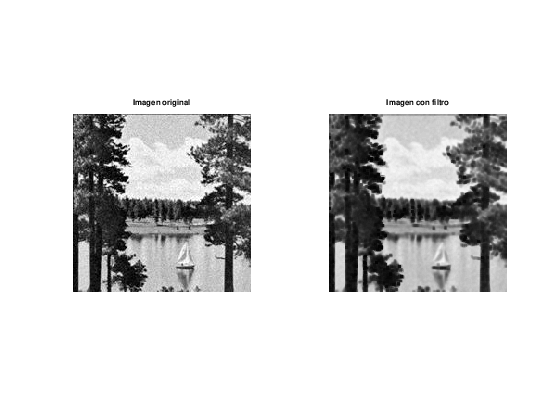

In [34]:
pkg load image

img = imread("./Imagenes/T.jpeg");
[m, n] = size(img);
img = im2double(img);

subplot(1,2,1);
imshow(img);
title('Imagen original');




filtered_image = harmonic_mean_filter(img, 3);


subplot(1,2,2);
imshow(filtered_image)

title('Imagen con filtro');


In [13]:
import cv2
import numpy as np

def contraharmonic_mean_filter(image, kernel_dims, R):
    (m, n) = image.shape
    
    result = np.zeros((m,n), np.float)
    
    for i in range(n):
        for j in range(m):
            kernel = cv2.getRectSubPix(image, (kernel_dims, kernel_dims), (i, j))
            
            numerator_power = np.power(kernel, R + 1)
            denominator_power = np.power(kernel, R)
            
            numerator = np.sum(numerator_power)
            denominator = np.sum(denominator_power)
            if (denominator != 0):
                result[j, i] = numerator/denominator
    return result
            
            
            
       

In [14]:
#Codigo obtenido de https://stackoverflow.com/users/4863031/shubham-pachori en https://stackoverflow.com/questions/22937589/how-to-add-noise-gaussian-salt-and-pepper-etc-to-image-in-python-with-opencv

def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    elif noise_typ == "p":
        [row,col] = image.shape
        s_vs_p = 0.5
        amount = 0.04
        out = np.copy(image)
        # Salt mode

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "s":
        [row,col] = image.shape
        s_vs_p = 0.5
        amount = 0.04
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 1
        # Pepper mode
        return out
    elif noise_typ == "s&p":
        [row,col] = image.shape
        s_vs_p = 0.5
        amount = 0.04
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 1
        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy

/var/folders/y2/9m0sq7vd6w59mz7wn7tzz2sm0000gn/T/ipykernel_41255/2781580488.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


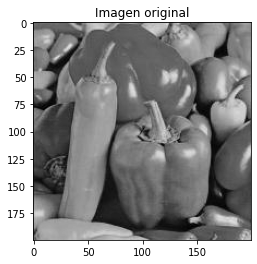

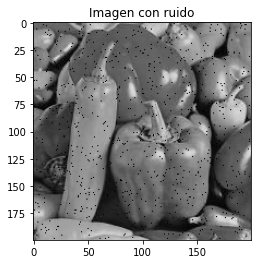

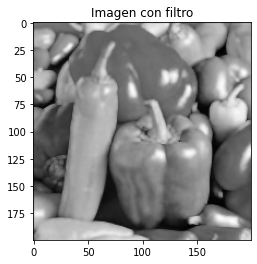

In [15]:
import cv2
import matplotlib.pyplot as plt

img_path = "./Imagenes/peppers.jpeg"

image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
[m, n] = image.shape

noi = noisy("p", image/255)

kernel_size = (3,3)
noi = np.float32(noi)
filtered_image = contraharmonic_mean_filter(noi, 3,2.0)


#fig, axs = plt.subplots(1, 4)
#plt.imshow(image, cmap='gray', vmin=0, vmax=255)

plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen original")
plt.show()


plt.imshow(noi, cmap='gray', vmin=0, vmax=1)
plt.title("Imagen con ruido")
plt.show()


plt.imshow(filtered_image, cmap='gray')
plt.title("Imagen con filtro")
plt.show()

## Filtro Punto Medio 

In [16]:
pkg load image

function filtered_image = mid_point_filter(img, kernel_dims)
    %This function applies the mid point filter to an image in array format
    %image: array_like representing the image
    %kernel_dims: dimentions for the kernel
    %returns: array_like representing the image with the midpoint filter applied

    [m, n] = size(img);
    filtered_image = zeros(m, n);
    
    
    for i = 1:n
        for j = 1:m
            submatrix = get_submatrix(img, kernel_dims, kernel_dims, i , j);
            max_value = max(max(submatrix));
            min_value = min(min(submatrix));
            
            filtered_image(j , i) = (max_value + min_value)/2;
        endfor
    endfor
endfunction



function submatrix = get_submatrix(image, size_x, size_y, i , j)
    %This function gets the submatrix of a new 
    %image: array_like representing the image
    %size_x: dimentions for the kernel in x axis
    %size_y: dimentions for the kernel in y axis
    %i: center in x
    %j:center in y
    %returns: array of the submatrix of the g
    distance_x = round(size_x/2) - 1;
    distance_y = round(size_y/2) - 1; 
    submatrix = get_submatrix_aux(image, distance_x, distance_x, distance_y, distance_y, i, j);
    
endfunction

function submatrix = get_submatrix_aux(image, size_x_right, size_x_left, size_y_up, size_y_down, i, j) 
    %This recursive function adjusts the kernel size of elements in case of borders and corners
    %image: array_like representing the image
    %size_x_right: dimentions for the kernel in x axis in the right
    %size_x_left: dimentions for the kernel in x axis in the left
    %size_y_up: dimentions for the kernel in y axis in the up side
    %size_y_down: dimentions for the kernel in y axis in the down side
    %i: center in x
    %j:center in y
    %returns: array of the submatrix of the g
    [m, n] = size(image);
    if (i - size_x_left < 1)
        submatrix = get_submatrix_aux(image, size_x_right, size_x_left - 1, size_y_up, size_y_down, i, j);
    elseif (i + size_x_right > n)
        submatrix = get_submatrix_aux(image, size_x_right - 1, size_x_left, size_y_up, size_y_down, i, j);
    elseif (j - size_y_up < 1)
        submatrix = get_submatrix_aux(image, size_x_right, size_x_left, size_y_up - 1, size_y_down, i, j);
    elseif (j + size_y_down > m)
        submatrix = get_submatrix_aux(image, size_x_right, size_x_left, size_y_up, size_y_down - 1, i, j);
    else
        submatrix = image( (j - size_y_up):(j + size_y_down), (i - size_x_left):(i + size_x_right));
    endif
endfunction

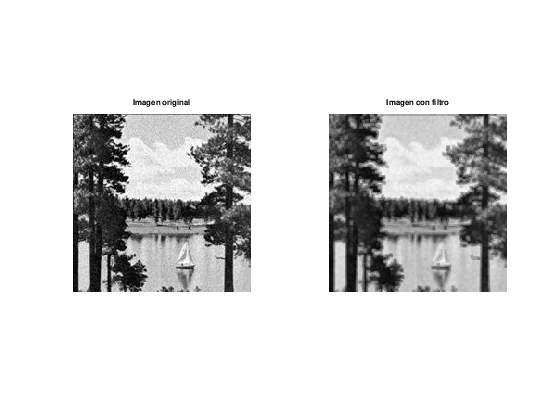

In [17]:
pkg load image
img = imread("./Imagenes/T.jpeg");
subplot(1,2,1);
imshow(img);
title('Imagen original');


noisy_image = im2double(img);

filtered_image = mid_point_filter(noisy_image, 3);


subplot(1,2,2);
imshow(filtered_image);
title('Imagen con filtro');

## Filtro Ideal (Rechazo de Banda)

In [18]:
def dist_matrix(img):
    """
    This function generates a matrix with the distance of each pixel from the center
    img -> image in a array_like representation
    result -> matrix of distances
    """
    [m, n] = img.shape
    result = np.zeros((m,n))  
    
    n1 = n//2
    m1 = m//2
    for i in range(n):
        for j in range(m):
            result[j, i] = np.sqrt((i-n1)**2 + (j-m1)**2)
    return result
def ideal_rejection_filter(image, w, d0):
    """
    This function applies a ideal filter to an image to remove periodic noise
    :param image: array_like representing the image
    :param w: width of the ring of the filter
    :param d0: diameter of the outer ring
    :returns: array_like representing the image with the ideal reject band filter
    """
    [m, n] = image.shape
    H = np.ones((m, n))
    dist = dist_matrix(image)
    index_a = d0 - (w/2) <= dist
    index_b = dist <= d0 + (w/2)
    
    
    index = np.logical_and(index_a, index_b)
    H[index] = 0
    H *= 255
    Ffreq = np.fft.fft2(image)
    F_shift = np.fft.fftshift(Ffreq)
    
    frw1=np.log(1 + np.abs(F_shift))
    
    
    freq_with_filter = H * F_shift
    
    frw2=np.log(1 + np.abs(freq_with_filter))
   
    
    result = np.fft.ifft2(np.fft.fftshift(freq_with_filter))
    result = np.abs(result)
    result *= (255.0/result.max())                      
    return [np.uint8(result), frw1, frw2]
    

    

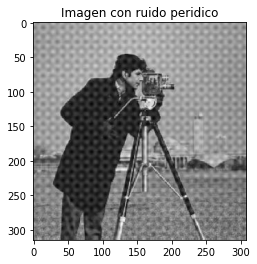

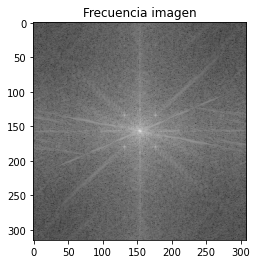

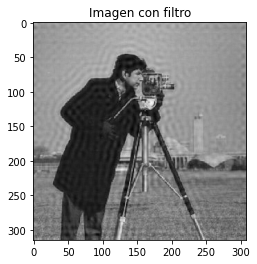

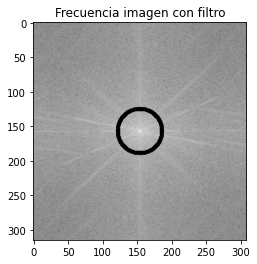

In [19]:
A = cv2.imread('./Imagenes/camarografo.jpeg', cv2.IMREAD_GRAYSCALE)
B = cv2.imread('./Imagenes/ruido_periodico.jpeg', cv2.IMREAD_GRAYSCALE)

C = B*0.35 + A 
[r, fwo, fw] = ideal_rejection_filter(C, 6, 32)

plt.imshow(C, cmap='gray')
plt.title("Imagen con ruido peridico")
plt.show()

plt.imshow(fwo, cmap='gray')
plt.title("Frecuencia imagen")
plt.show()

plt.imshow(r, cmap='gray')
plt.title("Imagen con filtro")
plt.show()

plt.imshow(fw, cmap='gray')
plt.title("Frecuencia imagen con filtro")
plt.show()
 

## Filtro Gaussiano (Rechazo de Banda)

In [20]:
def dist_matrix(img):
    """
    This function generates a matrix with the distance of each pixel from the center
    img -> image in a array_like representation
    result -> matrix of distances
    """
    [m, n] = img.shape
    result = np.zeros((m,n))  
    
    n1 = n//2
    m1 = m//2
    for i in range(n):
        for j in range(m):
            result[j, i] = np.sqrt((i-n1)**2 + (j-m1)**2)
    return result
def gaussian_rejection_filter(image, w, d0):
    """
    This function applies a gaussian filter to an image to remove periodic noise
    :param image: array_like representing the image
    :param w: width of the ring of the filter
    :param d0: diameter of the outer ring
    :returns: array_like representing the image with the ideal reject band filter
    """
    [m, n] = image.shape
    dist = dist_matrix(image)
    
    alpha = (np.power(dist, 2) - (d0**2))/(dist*w)
    H = 1 - np.exp((-1/2)*  (np.power(alpha, 2)))
    
    
    Ffreq = np.fft.fft2(image)
    F_shift = np.fft.fftshift(Ffreq)
    
    frw1=np.log(1 + np.abs(F_shift))
    
    
    freq_with_filter = np.fft.fftshift(np.fft.fftshift(H) * Ffreq)
    
    frw2=np.log(1 + np.abs(freq_with_filter))
   
    
    result = np.fft.ifft2(np.fft.fftshift(freq_with_filter))
    result = np.abs(result)
    result *= (255.0/result.max())                      
    return [np.uint8(result), frw1, frw2]
    

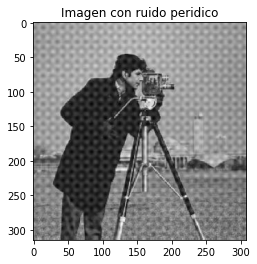

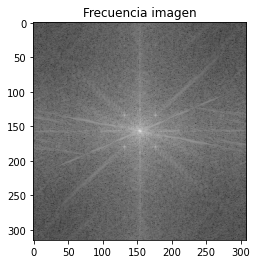

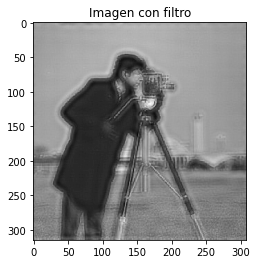

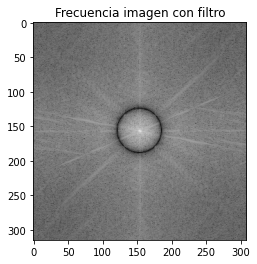

In [21]:
A = cv2.imread('./Imagenes/camarografo.jpeg', cv2.IMREAD_GRAYSCALE)
B = cv2.imread('./Imagenes/ruido_periodico.jpeg', cv2.IMREAD_GRAYSCALE)
np.warnings.filterwarnings('ignore')

C = B*0.35 + A 
[r, fwo, fw] = gaussian_rejection_filter(C, 20, 32)

plt.imshow(C, cmap='gray')
plt.title("Imagen con ruido peridico")
plt.show()

plt.imshow(fwo, cmap='gray')
plt.title("Frecuencia imagen")
plt.show()

plt.imshow(r, cmap='gray')
plt.title("Imagen con filtro")
plt.show()

plt.imshow(fw, cmap='gray')
plt.title("Frecuencia imagen con filtro")
plt.show()

## Filtro Butterworth (Rechazo de Banda) 

In [22]:
def dist_matrix(img):
    """
    This function generates a matrix with the distance of each pixel from the center
    img -> image in a array_like representation
    result -> matrix of distances
    """
    [m, n] = img.shape
    result = np.zeros((m,n))  
    
    n1 = n//2
    m1 = m//2
    for i in range(n):
        for j in range(m):
            result[j, i] = np.sqrt((i-n1)**2 + (j-m1)**2)
    return result
def butterworth_rejection_filter(image, w, d0, n):
    """
    This function applies a butterworth filter to an image to remove periodic noise
    :param image: array_like representing the image
    :param w: width of the ring of the filter
    :param d0: diameter of the outer ring
    :returns: array_like representing the image with the ideal reject band filter
    """
    [m, n] = image.shape
    dist = dist_matrix(image)
    
    alpha = ((dist*w)/(np.power(dist, 2) - d0**2))
    beta = 1 + np.power(alpha, 2*n)
    
    H = 1/beta
    
    Ffreq = np.fft.fft2(image)
    F_shift = np.fft.fftshift(Ffreq)
    
    frw1=np.log(1 + np.abs(F_shift))
    
    
    freq_with_filter = np.fft.fftshift(np.fft.fftshift(H) * Ffreq)
    
    frw2=np.log(1 + np.abs(freq_with_filter))
   
    
    result = np.fft.ifft2(np.fft.fftshift(freq_with_filter))
    result = np.abs(result)
    result *= (255.0/result.max())                      
    return [np.uint8(result), frw1, frw2]
    
    

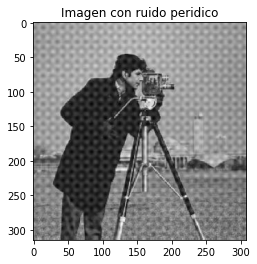

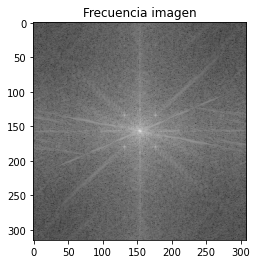

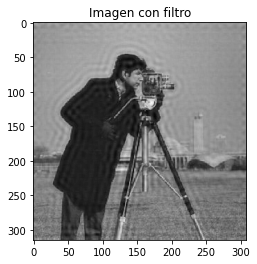

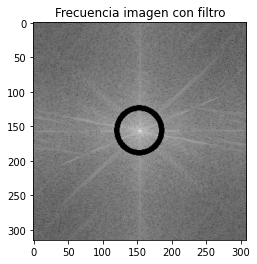

In [23]:
A = cv2.imread('./Imagenes/camarografo.jpeg', cv2.IMREAD_GRAYSCALE)
B = cv2.imread('./Imagenes/ruido_periodico.jpeg', cv2.IMREAD_GRAYSCALE)
np.warnings.filterwarnings('ignore')

C = B*0.35 + A 
[r, fwo, fw] = butterworth_rejection_filter(C, 8, 32, 5)

plt.imshow(C, cmap='gray')
plt.title("Imagen con ruido peridico")
plt.show()

plt.imshow(fwo, cmap='gray')
plt.title("Frecuencia imagen")
plt.show()

plt.imshow(r, cmap='gray')
plt.title("Imagen con filtro")
plt.show()

plt.imshow(fw, cmap='gray')
plt.title("Frecuencia imagen con filtro")
plt.show()